# Horolezecký algoritmus pro hledání maximálního souseda ve 2D poli

In [39]:
import numpy as np

rnd_array = np.random.randint(1, high=50, size=(10, 10))
start_coordinates = (9, 9)

def find_neighbors(coordinates, rnd_array):
    neighbors = []
    neighbors.append((coordinates[0]-1, coordinates[1]))
    neighbors.append((coordinates[0]+1, coordinates[1]))
    neighbors.append((coordinates[0], coordinates[1]-1))
    neighbors.append((coordinates[0], coordinates[1]+1))
    neighbors.append((coordinates[0]-1, coordinates[1]-1))
    neighbors.append((coordinates[0]-1, coordinates[1]+1))
    neighbors.append((coordinates[0]+1, coordinates[1]-1))
    neighbors.append((coordinates[0]+1, coordinates[1]+1))
    neighbors = [x for x in neighbors if x[0] >= 0 and x[1] >= 0 and x[0] < rnd_array.shape[0]
                 and x[1] < rnd_array.shape[1]]
    return neighbors

def hill_climb(current_coordinates, rnd_array):
    neighbors = find_neighbors(current_coordinates, rnd_array)
    ascended = False
    next_coordinates = current_coordinates
    for neighbor in neighbors:
        if rnd_array[neighbor[0]][neighbor[1]] > rnd_array[current_coordinates[0]][current_coordinates[1]]:
            next_coordinates = neighbor
            ascended = True
    return ascended, next_coordinates

def find_maximum_neighbor(array, start_coordinates):
    print(rnd_array)
    current_coordinates = start_coordinates
    count = 1
    ascended = True
    while ascended is True:
        print("\nStep", count)
        print("Current coordinates: ", current_coordinates)
        print("Current value: ", rnd_array[current_coordinates[0]][current_coordinates[1]])
        count += 1
        ascended, current_coordinates = hill_climb(current_coordinates, rnd_array)

    print("\nFinal value: ", rnd_array[current_coordinates[0]][current_coordinates[1]])
    
find_maximum_neighbor(rnd_array, start_coordinates)

[[11 24  2 11 11 26 34 22 41  1]
 [ 8  6 41 16 22 48 44 47 39 49]
 [34  4 24 27 13 25 38 25 42  4]
 [30  9 37 39 28 47 12 26 17 12]
 [15 33 27 30 31  5  3 46 23 19]
 [28 45 12 31 13 26 23 43 37 48]
 [44 25 10 42 11  6 48 22 19 18]
 [35 48 14 40 42 24 27 30 42  1]
 [ 1  9 41 38 43 17  5 34 18 24]
 [15 34 49 33 15 24 41  2 35  2]]

Step 1
Current coordinates:  (9, 9)
Current value:  2

Step 2
Current coordinates:  (8, 8)
Current value:  18

Step 3
Current coordinates:  (7, 7)
Current value:  30

Step 4
Current coordinates:  (6, 6)
Current value:  48

Final value:  48


# Náhodné prohledávání

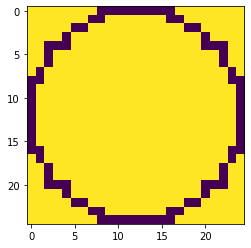

In [1]:
# import obrázku kruhu pro následující úlohy
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from random import choice, random, sample

img = Image.open('circle_img.png')
pix = list(img.getdata())

plt.imshow(np.array(pix).reshape(25,25))

1. iter:


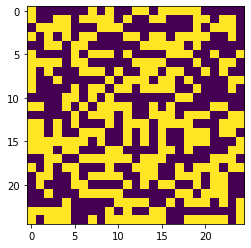

10. iter:


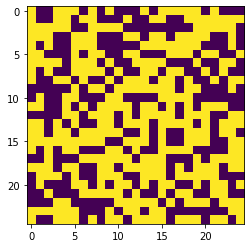

20. iter:


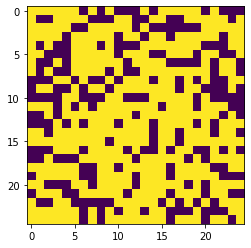

30. iter:


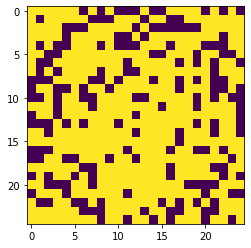

40. iter:


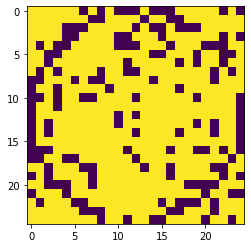

50. iter:


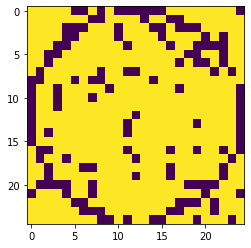

60. iter:


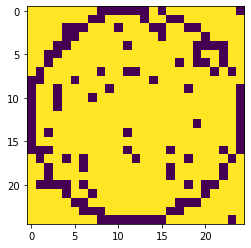

70. iter:


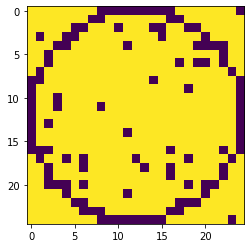

80. iter:


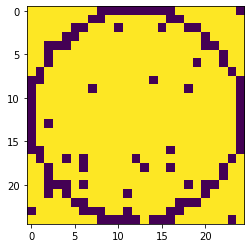

90. iter:


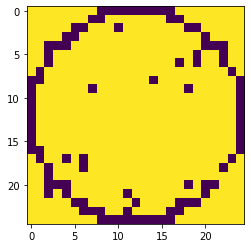

100. iter:


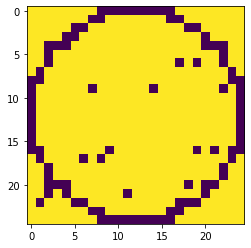

110. iter:


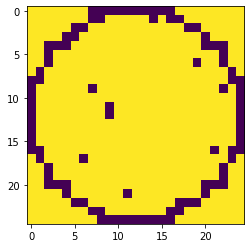

120. iter:


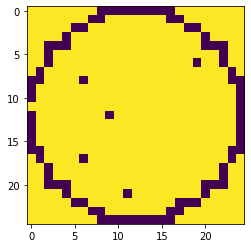

130. iter:


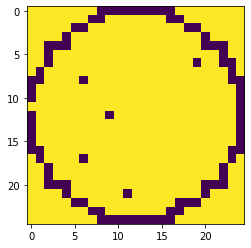

140. iter:


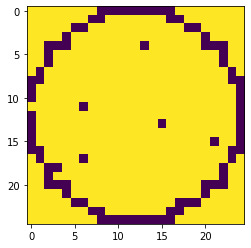

150. iter:


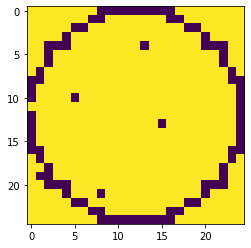

160. iter:


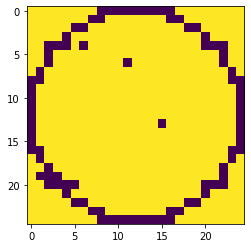

170. iter:


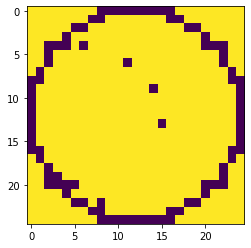

180. iter:


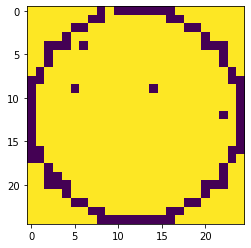

190. iter:


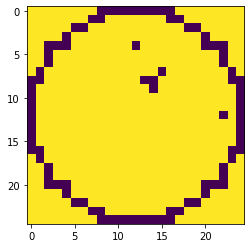

200. iter:


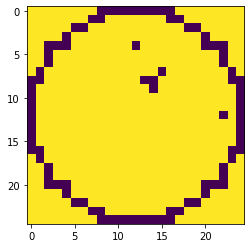

210. iter:


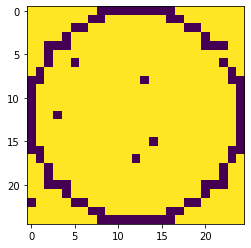

220. iter:


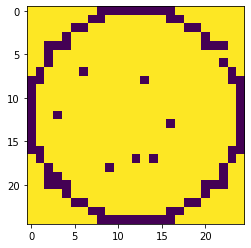

230. iter:


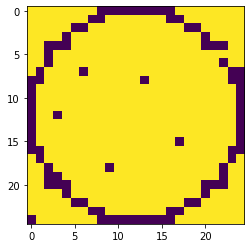

240. iter:


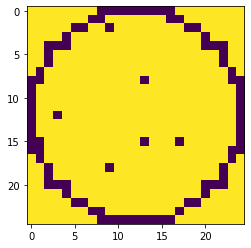

250. iter:


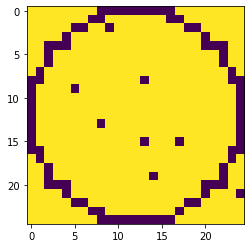

260. iter:


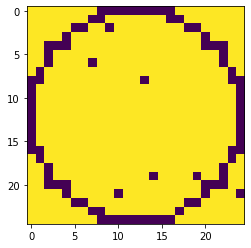

270. iter:


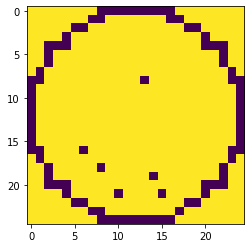

280. iter:


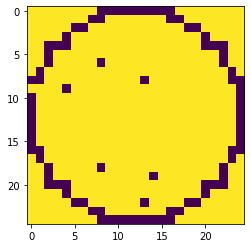

290. iter:


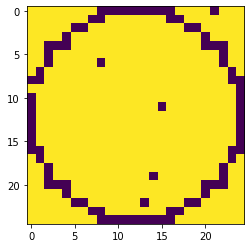

300. iter:


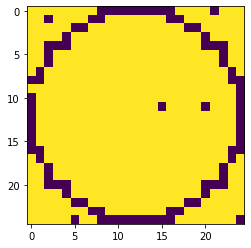

310. iter:


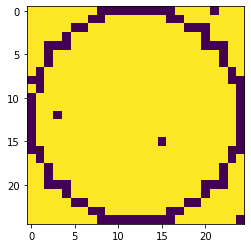

320. iter:


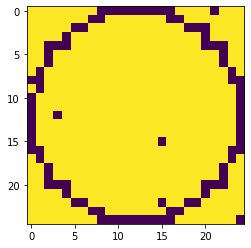

330. iter:


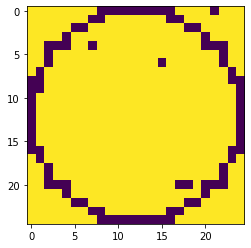

340. iter:


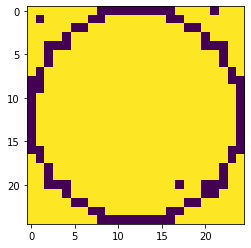

350. iter:


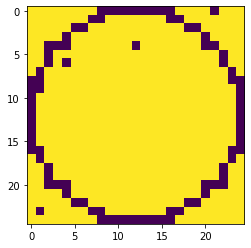

360. iter:


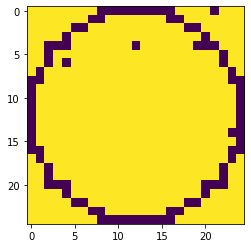

370. iter:


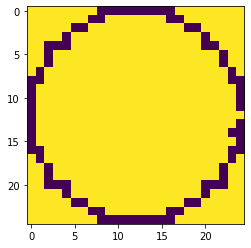

380. iter:


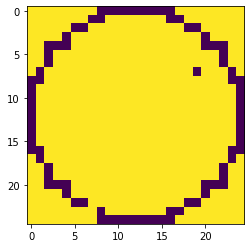

390. iter:


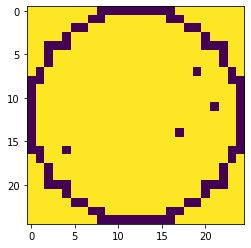

400. iter:


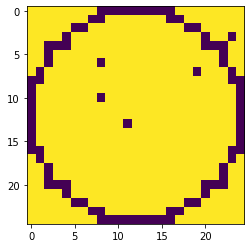

410. iter:


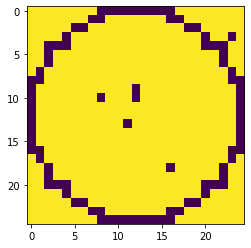

420. iter:


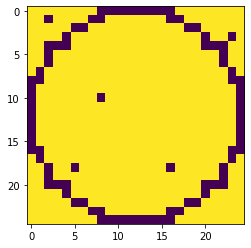

430. iter:


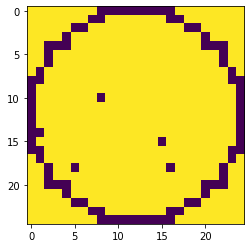

440. iter:


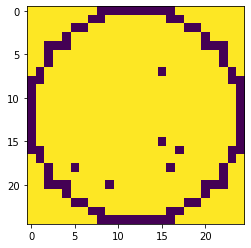

450. iter:


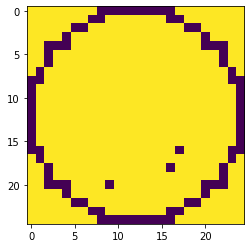

460. iter:


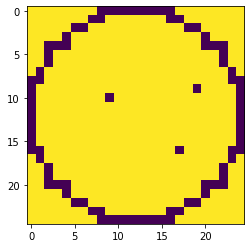

470. iter:


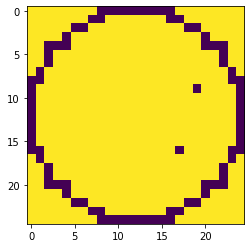

480. iter:


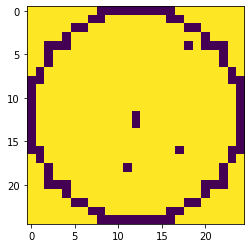

490. iter:


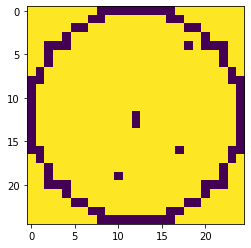

500. iter:


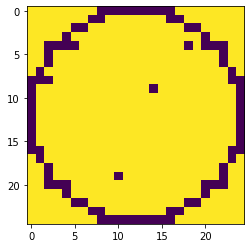

510. iter:


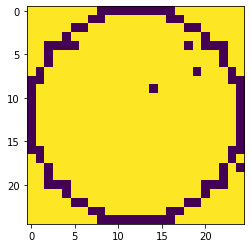

520. iter:


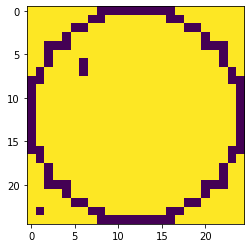

530. iter:


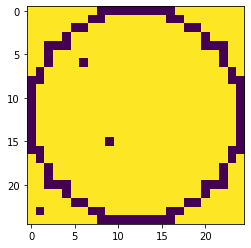

540. iter:


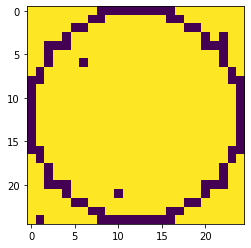

550. iter:


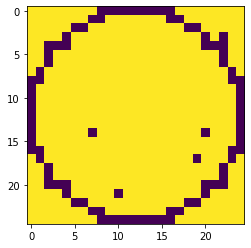

560. iter:


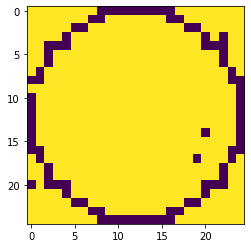

570. iter:


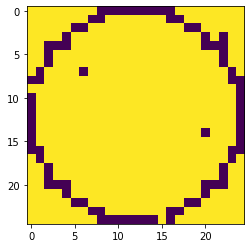

580. iter:


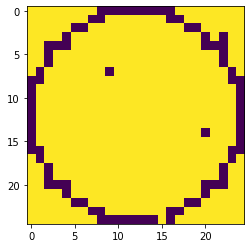

590. iter:


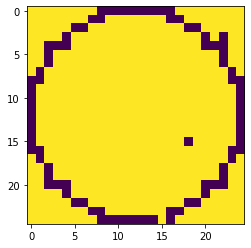

600. iter:


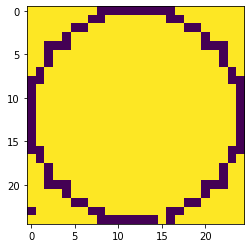

610. iter:


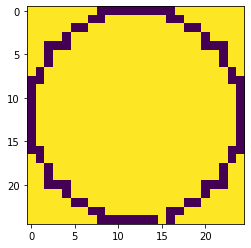

620. iter:


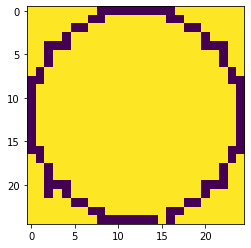

630. iter:


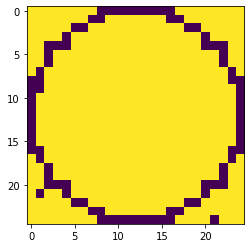

640. iter:


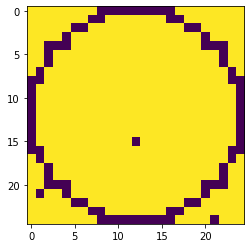

650. iter:


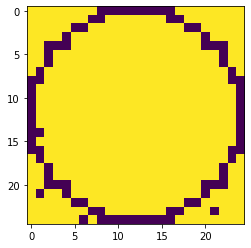

660. iter:


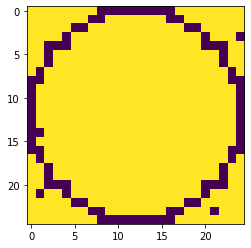

670. iter:


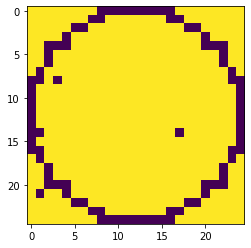

680. iter:


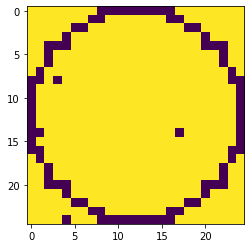

690. iter:


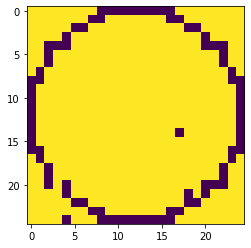

700. iter:


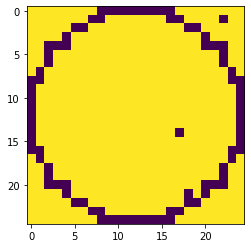

710. iter:


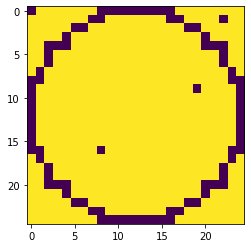

720. iter:


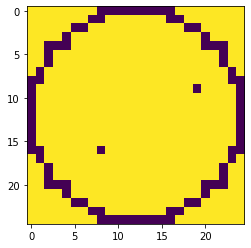

730. iter:


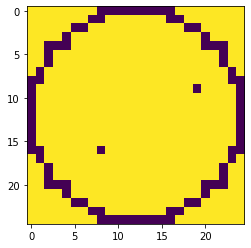

740. iter:


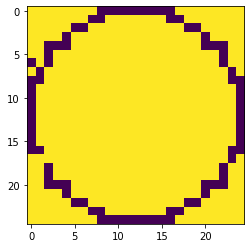

750. iter:


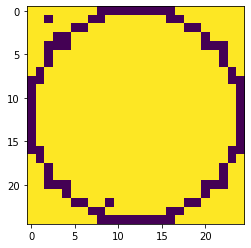

760. iter:


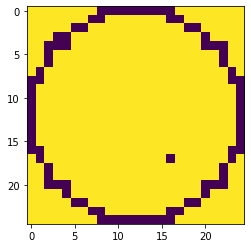

770. iter:


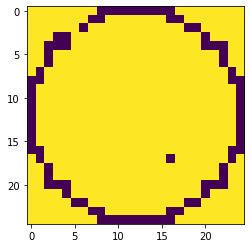

780. iter:


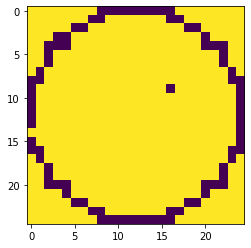

790. iter:


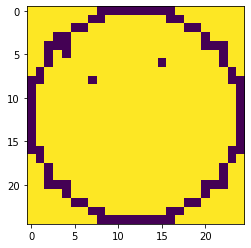

800. iter:


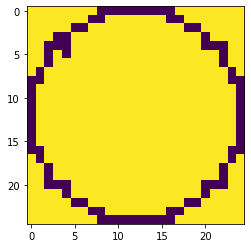

810. iter:


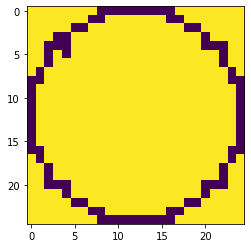

820. iter:


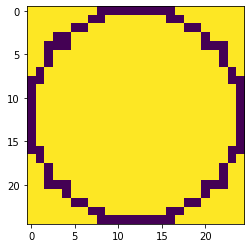

830. iter:


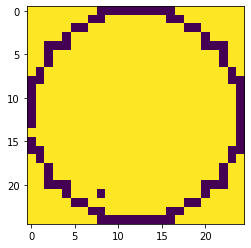

840. iter:


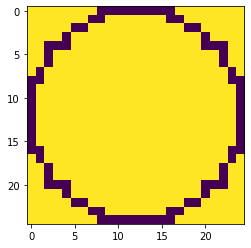

840. iter:


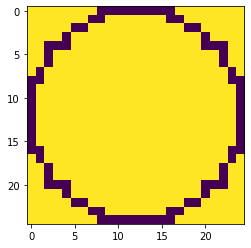

In [36]:
palt = 0.02
palternativ = 1000
max_i = 1000

circle = pix
values = [0, 1]

def evaluate(candidate):
    return sum(v == j for v,j in zip(candidate, circle))

def alternate(candidate):
    return [choice(values) if random() < palt else v for v in candidate]

def random_search():
    candidate = [choice(values) for _ in range(len(circle))]

    i = 1
    while candidate != circle and i <= max_i:
        alternatives = (alternate(candidate) for _ in range(palternativ))
        candidate = max(alternatives, key=evaluate)
        if i % 10 == 0 or i == 1:
            print(f"{i}. iter:")
            plt.imshow(np.array(candidate).reshape(25,25))
            plt.show()
        if candidate == circle:
            print(f"{i}. iter:")
            plt.imshow(np.array(candidate).reshape(25,25))
            plt.show()
        i += 1

random_search()

# Evoluční algoritmus

1. iter:


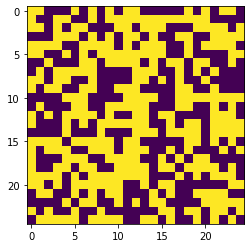

10. iter:


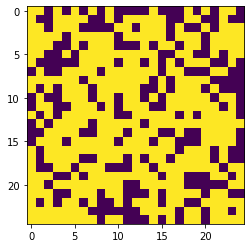

20. iter:


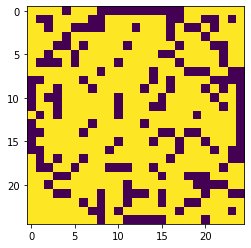

30. iter:


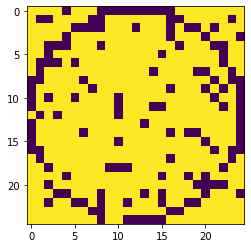

40. iter:


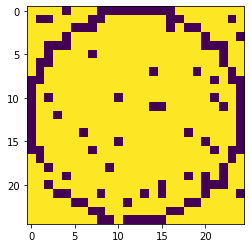

50. iter:


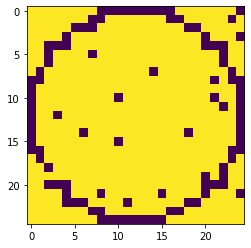

60. iter:


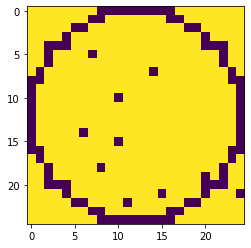

70. iter:


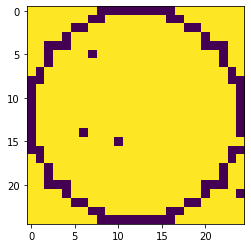

80. iter:


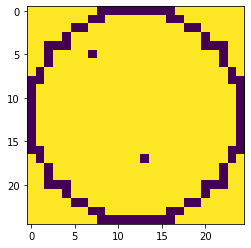

90. iter:


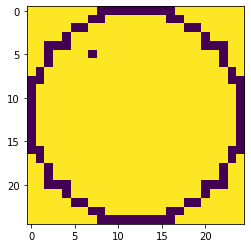

99. iter:


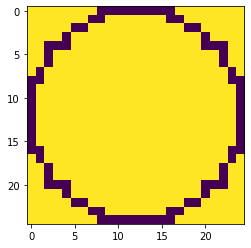

In [35]:
palt = 0.02
palternativ = 1000
max_i = 1000

phybridization = 0.5
count_of_parents = 2

circle = pix
values = [0, 1]

def selection(population):
    return [parent for parent in sorted(population, key=evaluate, reverse=True)[:count_of_parents]]

def hybridization(parents):
    pair = [sample(parents, 2) for i in range(palternativ)]
    return [[p1[i] if random() < phybridization else p2[i] for i in range(len(p1))] for p1, p2 in pair]

def mutation(deti):
    return [[choice(values) if random() < palt else l for l in deti[i]] for i in range(len(deti))]

def evo_algorithm():
    population  = [[choice(values) for _ in range(len(circle))] for i in range(count_of_parents)]

    for generation in range(max_i):
        parents = selection(population)
        
        if (generation + 1) % 10 == 0 or generation == 0 or circle in parents:
            print(f"{generation + 1}. iter:")
            plt.imshow(np.array(parents[0]).reshape(25,25))
            plt.show()
            if circle in parents:
                break            

        population = hybridization(parents)
        population = mutation(population)
        
evo_algorithm()